# Eksempel: en ideell pendel

Her skal vi ta for oss en litt mer komplisert andreordens differensialligning hvor vi faktisk trenger numeriske metoder for å løse den, i motsetning til de lineære

### Oppsett

Vi ser på en *idealisert* pendel: en punktmasse med masse $m$ opphengt i en masseløs stang med lengde $l$. Denne kan beskrives av én enkelt størrelse, nemlig vinkelutslaget $\theta$.
Se figuren under.

<img src="3_pendel.png" style="width: 25%">

Her betyr $\theta = 0$ at pendelen henger rett ned, imens $\theta = \pm\pi$ betyr at pendelen står akkurat på balansepunktet hvor den peker rett opp. $\theta = 2\pi$ betyr at pendelen har rotert én gang mot klokka og igjen henger rett ned.


### Differensialligningen(e)
De eneste kreftene som virker på punktmassen på enden av stanga er tyngdekraften, som er $m g$, hvor $g$ er tyngdeakselerasjonen hvor pendelen befinner seg.
Vi antar altså at det ikke er noen friksjon inne i bildet

Da kan vi fra Newtons andre lov utlede differensialligningen

$$ \theta'' + \frac{g}{l}\sin(\theta) = 0 \tag{3.13} $$
hvor $\theta = \theta(t)$ er vinkelutslaget ved tid $t$, .
Videre er  og $l$ er lengden av pendelen.

Vinkelhastigheten $\theta'$ hvor fort pendelen svinger

Vi ser at massen $m$ faktisk ikke spiller noen rolle! Det er fordi vi ignorerer friksjon

Dette er en andreordens *ikkelineær* differensialligning, som vi ikke kan løse eksakt.
Det er derimot ikke vanskelig å tilnærme løsningen med Eulers metode, og et av hovedgrunnene for å lære numeriske metoder er jo nettopp å kunne tilnærmet løse ligninger som ikke kan løses eksakt.

Men for små utslag $\theta$ har vi at $\sin(\theta) \approx \theta$, sånn at en tilnærming av denne ligningen er

$$ \theta'' + \omega^2 \theta = 0 \tag{3.14} $$

hvor vi har introdusert $\omega = \sqrt{g/l}$ siden både $g$ og $L$ er positive størrelser.
Dette er derimot en lineær annenordens differensialligning, og den eksakte løsningen vil vil være en lineærkombinasjon av de trigonometriske funksjonene $\sin(\omega t)$ og $\cos(\omega t)$.

### Faseportretter og vinkelutslag
At Eulers metode tilfører energi som ikke er kan også sees ved å plotte $\theta$ og $\theta'$ mot hverandre.
Dette er et såkalt *faseportrett*, og en gitt løsning av ligningen vil være en kurve i dette planet hvor den frie variablen $t$ angir posisjonen langs kurven.

<img src="3_faseplott.png" style="width: 80%">

Til venstre ovenfor har vi faseportrettet for den opprinnelige idealiserte pendelen, og til høyre har vi faseportrettet for den forenklede ligningen.
Vi legger merke til at for små vinkelutslag, det vil si $\theta$ nær $0$, er portrettene nokså like.
Dette er rimelig, tilnærmingen $\sin(\theta) \approx \theta$ kun er god for små verdier.
For større vinkelutslag er portrettene derimot veldig forskjellige.

De ulike kurvene tilsvarer ulike løsninger av ligningene, man kan tenke seg at man har én kurve for hvert sett med startverdier.
Et sett med startverdier $\theta_0$ og $\theta_0'$ spesifiserer et punkt i planet, og løsningen av ligningen vil følge kurven som går gjennom dette punktet.
Her ser vi at startverdier som gir punkter nær origo vil gi temmelig lik oppførsel for begge ligningene.

Når pendelen har sine største utslag må vinkelhastigheten $\theta'$ være null: idet den har sitt største positive vinkelutslag må $\theta'$ endre fortegn fra positivt til negativt, og omvendt for det mest negative vinkelutslaget.
Legg merke til at alle de lukkede kurvene i faseportrettene har *to* punkter hvor $\theta' = 0$: ett der pendelen har sitt største positive vinkelutslag (i høyre retning), og ett der pendelen har sitt mest negative vinkelutslag.

På den annen side ser vi at kurvene som ikke er lukkede i portrettet til venstre aldri tar $\theta'$ aldri verdien $0$, den er alltid enten positiv eller negativ.

>**Merk:** Ser du nå hvorfor ligningen (3.14) er en urimelig modell for pendelen i figuren ovenfor?

### Energier
Hver ligning har også en tilhørende energi; den idealiserte pendelen har energi gitt av uttrykket
$$ \frac12 (\theta')^2 + 1-\cos(\theta), \qquad  $$
imens den forenklede ligningen har energi
$$\frac12\left((\theta')^2 + \theta^2 \right). $$
Det er ingen friksjon, eller tap av energi, i disse systemene så hver løsningskurve tilsvarer et bestemt konstant energinivå. I figurene svarer blålige farger til lavere energinivåer og rødlige farger til høyere energinivåer.

Merk at for et gitt energinivå $E > 0$ tilsvarer energien til det forenklede systemet en sirkel i $\theta$-$\theta'$-planet med radius $\sqrt{2E}$,
$$ \theta^2 + (\theta')^2 = 2E. $$
Derfor er alle løsningskurvene i høyre figur lukkede sirkler.

Dersom vi går tilbake til sammenligningen ovenfor og forsøker å plassere startverdiene $\theta(0) = 1$ og $\theta'(0) = 0$ i det venstre faseportrettet ser vi at dette ligger på en lukket kurve (nesten ellipseformet), som svarer til en bestemt mengde energi.
Derimot vil tilnærmingene gitt ved Eulers metode gi oss en spiral som går utover, til høyere energinivåer i faseportrettet.

## Eulers metode
La oss skrive om den andre ordens, *ikkelineære* differensialligningen (3.13) til et førsteordens system. Vi introduserer den nye variabelen $\phi = \theta'$, og får systemet

$$ \begin{bmatrix} \theta' \\ \phi' \end{bmatrix} = \begin{bmatrix} \phi \\ -\omega^2 \sin(\theta) \end{bmatrix}. $$

La $h > 0$ være skrittlengden og definer $t_n = n h$. Videre lar vi $\theta_n$ være tilnærmingen av $\theta(t_n)$, og tilsvarende er $\phi_n$ tilnærmingen av $\phi(t_n) = \theta'(t_n)$.
Da finner vi at Eulers metode for dette systemet blir

$$ \begin{aligned} \theta_{n+1} &= \theta_n + h \phi_n, \\ \phi_{n+1} &= \phi_n - h \omega^2 \sin(\theta_n) . \end{aligned} \tag{3.15} $$


## Sammenligning
Med fare for å motsi oss selv fra tidligere, la oss sammenligne Eulers metode for (3.13) med den eksakte løsningen gitt av tilnærmingen (3.14).
La oss velge $\omega = 1$, startvinkelen $\theta(0) = \theta_0 = 0$ og start-vinkelhastigheten $\theta'(0) = \theta'_0 = 1$.
Vi finner da at den forenklede ligningen (3.14) har løsningen $ \theta(t) = \sin(t) $.

Text(0.5, 1.0, "Vinkelhastighet $\\theta'$")

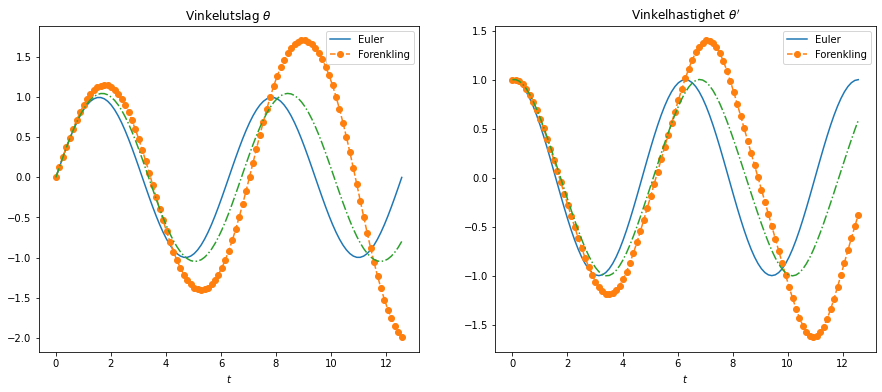

In [64]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

omega = 1 # omega
theta0 = 0 # startvinkel
phi0 = 1 #start-vinkelhastighet

T = 4*np.pi # slutt-tidspunkt
N = 100 # antall steg med Euler
h = T/N # skrittlengde
tn = np.linspace(0,T,N+1)

def Y(t): # eksakt løsning av forenklet ligning
    return theta0*np.cos(omega*t) + (phi0/omega)*np.sin(omega*t)

def dY(t): # den deriverte av funksjonen ovenfor
    return -omega*theta0*np.sin(omega*t) + phi0*np.cos(omega*t)

Xn = np.zeros([N+1,2]) # liste med verdier for Eulers metode
Xn[0,0] = theta0
Xn[0,1] = phi0

Zn = np.zeros([N+1,2]) # liste med verdier for Eulers metode
Zn[0,0] = theta0
Zn[0,1] = phi0

for k in range(0,N): # N steg med Eulers metode for opphavelig ligning
    Xn[k+1,0] = Xn[k,0] + h*Xn[k,1]
    Xn[k+1,1] = Xn[k,1] - h*(omega**2)*np.sin(Xn[k,0])
    
    Zn[k+1,1] = Zn[k,1] - h*(omega**2)*np.sin(Zn[k,0])
    Zn[k+1,0] = Zn[k,0] + h*Zn[k+1,1]

tm = np.linspace(0,T,101)

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.plot(tm,Y(tm))
ax1.plot(tn, Xn[:,0],'--o')
ax1.plot(tn, Zn[:,0],'-.')
ax1.set_xlabel(r'$t$')
ax1.legend(['Euler','Forenkling'])
ax1.set_title(r'Vinkelutslag $\theta$')

ax2.plot(tm,dY(tm))
ax2.plot(tn,Xn[:,1],'--o')
ax2.plot(tn,Zn[:,1],'-.')
ax2.set_xlabel(r'$t$')
ax2.legend(['Euler','Forenkling'])
ax2.set_title(r"Vinkelhastighet $\theta'$")

Vi ser her at vi har periodisk oppførsel for både tilnærmingen gitt av Eulers metode, og (selvfølgelig) for sinusbevegelsen til det forenklede systemet.
Dessuten indikerer tilnærmingen vi får med Eulers metode at perioden til det opphavelige systemet er lenger enn for det tilnærmede systemet.

Den periodiske oppførselen indikerer at ingen energi går tapt for dette systemet. En mer naturtro modell ville tatt hensyn til friksjon, som til ville fått pendelen til å svinge med stadig mindre utslag til den til slutt henger i ro.
Apropos energi, vi kan legge merke til at utslagene for tilnærmingen med Eulers metode blir gradivis litt større.
Dette er en bieffekt av Eulers metode, den eksakte løsingen skal ha like store utslag hver gang.
Man kan redusere denne økningen litt ved å velge en mindre steglengde $h$, men den vil alltid være der: på denne måten legger Eulers metode til energi som ikke er der.

0.5


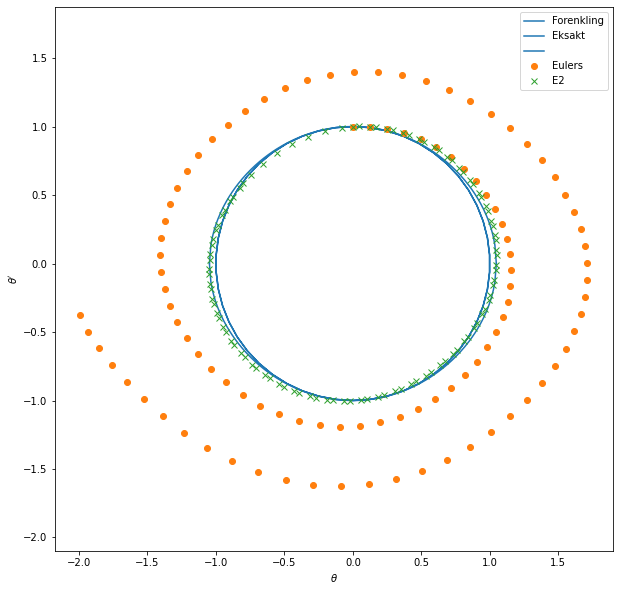

In [65]:
E = (phi0**2)/2 + 1 - np.cos(theta0)
print(E)
thetamax = np.arccos(1-E)

thetak = np.linspace(-thetamax,thetamax,201)

fig = plt.figure(figsize=(10,10))
plt.axis('equal')

plt.plot(Y(tm),dY(tm)) # eksakt løsning av forenklet ligning

plt.plot(thetak,np.sqrt(2*(E-1+np.cos(thetak))),'tab:blue')
plt.plot(thetak,-np.sqrt(2*(E-1+np.cos(thetak))),'tab:blue')

plt.plot(Xn[:,0],Xn[:,1],'o') # approksimasjoner gitt av Eulers metode
plt.plot(Zn[:,0],Zn[:,1],'x') # approksimasjoner gitt av Eulers metode

plt.xlabel(r'$\theta$')
plt.ylabel(r"$\theta'$")
plt.legend(['Forenkling','Eksakt','','Eulers','E2'])

>**Merk:**
Siden den forenklede ligningen ble utledet ved å anta små vinkelutslag er det en spesifikk type oppførsel den ikke kan gi oss, og det er når pendelen har så stor energi at den roterer hele veien rundt istedenfor så svinge frem og tilbake. Prøv å doble start-vinkelhastigheten i koden ovenfor og se hva som skjer.

### Energibevarende numeriske metoder 
Denne typen tilførsel av energi vil fort gi veldig store avvik når man simulerer systemer over lang tid.
Bare se for deg en numerisk simulering av planetbanene rundt sola hvor jorda til slutt forlater solsystemet!
Nettopp på grunn av slike situasjoner har det blitt lagt inn mye innsats i å utvikle numeriske metoder som også bevarer viktige fysiske størrelser for systemene man simulerer, som for eksempel energi.


Utrolig nok vil en liten endring i Eulers metode (3.15) gi approksimasjoner som oppfører seg langt bedre

$$ \begin{align*} \phi_{n+1} &= \phi_n - h \omega^2 \sin(\theta_n), \\ \theta_{n+1} &= \theta_n + h \phi_{n+1}  \end{align*} $$

*symplektisk Euler* semi-implisitt Euler